In [2]:
# Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 2000)
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from scipy import spatial

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Our method

In [3]:
# Import
path = r'data/trimmed_patient_embedding_128d.csv'
patients_embeddings = pd.read_csv(path, index_col=0)

In [ ]:
# Import
path = r'data/final_problem_dummies.csv'
problem_dummies = pd.read_csv(path)

In [ ]:
# Drop columns
problem_dummies.drop(columns=['SUBJECT', 'PROBLEM_DT_TM'], inplace=True)
# Remove prefix
problem_dummies.columns = problem_dummies.columns.str.strip('PROBLEM_')
# Set index
problem_dummies.set_index('new_subject', inplace=True)

In [4]:
# Get closest point for each point
distance, index = spatial.KDTree(patients_embeddings).query(patients_embeddings, k=2)

In [ ]:
# Create df
index_df = pd.DataFrame(index, columns=['0', '1'])
# Filter for where closest is self - i.e., unique
filtered_index_df = index_df[index_df['0'] == index_df.index]
filtered_index_df 

In [7]:
# Save
import pickle
no_match_patients_list = filtered_index_df.index.tolist()
with open('no_match_patients_list.pickle', 'wb') as handle:
    pickle.dump(no_match_patients_list, handle)

In [9]:
len(no_match_patients_list)

32251

In [29]:
# Get random list of 1000 patients
# Doing it post calculation so that we can select for patients where there is no exact match!
random_list = list(filtered_index_df.index)
random.Random(0).shuffle(random_list)
random_list = random_list[:1000]

In [31]:
# filter problem_dummies for random patients 
filtered_index_df2 = filtered_index_df.loc[random_list]

In [33]:
# Save
#filtered_index_df2.to_csv('cbr_metric_my_method.csv')

In [66]:
# Import
path = r'data/international_snomed_distance.csv'
snomed_distance = pd.read_csv(path, index_col=0)
snomed_distance.index = snomed_distance.index.astype(str)
snomed_distance.columns = snomed_distance.columns.astype(str)
# Add 1 to df
snomed_distance = snomed_distance+1

In [68]:
snomed_distance

,52011008,202752002,197632002,205824006,423125000,90325002,38101003,295125005,127189005,372138000,61653009,282026002,78250005,203178006,162218007,146801000119103,15188001,302932006,2089002,230654000,...,52781008,403202002,400130008,232407000,254935002,18391007,125501000119105,93143009,230572002,723116002,40108008,415105001,41345002,371073003,5505005,425558002,262955000,367403001,109355002,65323003
52011008,1.0,5.0,6.0,5.0,3.0,5.0,6.0,6.0,6.0,6.0,4.0,3.0,6.0,5.0,7.0,6.0,5.0,5.0,3.0,5.0,...,4.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,5.0,4.0,6.0,6.0,6.0,5.0,6.0,5.0,5.0
202752002,5.0,1.0,7.0,5.0,5.0,5.0,6.0,7.0,5.0,6.0,6.0,4.0,5.0,5.0,7.0,5.0,6.0,5.0,4.0,5.0,...,4.0,6.0,5.0,5.0,5.0,6.0,6.0,5.0,4.0,4.0,5.0,5.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0
197632002,6.0,7.0,1.0,7.0,8.0,7.0,7.0,9.0,8.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,6.0,8.0,6.0,7.0,...,7.0,8.0,7.0,7.0,7.0,8.0,8.0,8.0,7.0,8.0,7.0,7.0,7.0,8.0,6.0,8.0,7.0,7.0,7.0,7.0
205824006,5.0,5.0,7.0,1.0,5.0,5.0,5.0,6.0,6.0,4.0,5.0,4.0,5.0,5.0,7.0,5.0,4.0,6.0,4.0,5.0,...,4.0,6.0,5.0,4.0,5.0,7.0,6.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0
423125000,3.0,5.0,8.0,5.0,1.0,6.0,6.0,6.0,6.0,5.0,4.0,4.0,6.0,5.0,8.0,6.0,5.0,5.0,4.0,5.0,...,4.0,6.0,5.0,5.0,5.0,6.0,7.0,5.0,5.0,6.0,7.0,5.0,4.0,7.0,6.0,6.0,4.0,6.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425558002,6.0,6.0,8.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,7.0,4.0,6.0,6.0,8.0,6.0,6.0,7.0,5.0,6.0,...,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,7.0,6.0,1.0,6.0,5.0,4.0,6.0
262955000,5.0,5.0,7.0,5.0,4.0,5.0,6.0,6.0,6.0,6.0,5.0,4.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,4.0,...,5.0,6.0,4.0,5.0,4.0,6.0,6.0,6.0,5.0,7.0,5.0,4.0,5.0,6.0,5.0,6.0,1.0,5.0,5.0,5.0
367403001,6.0,6.0,7.0,5.0,6.0,4.0,7.0,7.0,6.0,5.0,7.0,5.0,5.0,6.0,8.0,6.0,6.0,6.0,6.0,5.0,...,5.0,7.0,5.0,5.0,4.0,7.0,6.0,5.0,5.0,7.0,6.0,5.0,6.0,6.0,6.0,5.0,5.0,1.0,5.0,6.0
109355002,5.0,5.0,7.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,6.0,5.0,7.0,4.0,5.0,6.0,5.0,4.0,...,5.0,5.0,5.0,5.0,4.0,6.0,6.0,4.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,4.0,5.0,5.0,1.0,5.0


In [75]:
# Calculate metric for how good the patient similarity methods are - based on snomed distances 

# Get patient and neighbour numbers
overall_score_list = []
z = -1
for patient_n in filtered_index_df2.index.tolist():
    z += 1
    if z % 100 == 0:
        print(z)
    neighbour_n = filtered_index_df2.loc[patient_n]['1']
    # Get patient and neighbour problems
    patient_problems = problem_dummies.loc[patient_n][problem_dummies.loc[patient_n] == 1].index.tolist()
    neighbour_problems = problem_dummies.loc[neighbour_n][problem_dummies.loc[neighbour_n] == 1].index.tolist()
    # Get snomed distances
    temp_df = snomed_distance.loc[patient_problems, neighbour_problems]
    # Get min for each row and column
    score_list = []
    for x in range(len(temp_df)):
        score_list.append(temp_df.iloc[x].min())
    for x in range(len(temp_df.columns)):
        score_list.append(temp_df.iloc[:,x].min())
    # Work out score (by taking 1 minus the reciprical and summing)
    cum_score = 0
    for n in score_list:
        temp_score = 1 - (1/n)
        cum_score += temp_score
    # Append to list
    overall_score_list.append(cum_score)


0
100
200
300
400
500
600
700
800
900


In [78]:
# Add to df
filtered_index_df2['similarity_score'] = overall_score_list

In [82]:
# Overall results
filtered_index_df2['similarity_score'].mean()
filtered_index_df2['similarity_score'].std()
filtered_index_df2['similarity_score'].max()
filtered_index_df2['similarity_score'].min()

1.7840464285714288

1.8959470724481202

20.883333333333336

0.0

In [92]:
# Save
#filtered_index_df2.to_csv('cbr_metric_my_method.csv')

# One hot / dummies

In [93]:
# Get closest point for spesfic point
dummies_distance, dummies_index = spatial.KDTree(problem_dummies).query(problem_dummies.loc[random_list], k=2)

In [94]:
# Create df
dummies_index_df = pd.DataFrame(dummies_index, columns=['0', '1'])

# Calculate metric for how good the patient similarity methods are - based on snomed distances 

# Get patient and neighbour numbers
overall_score_list = []

for patient_n in dummies_index_df.index.tolist():
    neighbour_n = dummies_index_df.loc[patient_n]['1']
    # Get patient and neighbour problems
    patient_problems = problem_dummies.loc[patient_n][problem_dummies.loc[patient_n] == 1].index.tolist()
    neighbour_problems = problem_dummies.loc[neighbour_n][problem_dummies.loc[neighbour_n] == 1].index.tolist()
    # Get snomed distances
    temp_df = snomed_distance.loc[patient_problems, neighbour_problems]
    # Get min for each row and column
    score_list = []
    for x in range(len(temp_df)):
        score_list.append(temp_df.iloc[x].min())
    for x in range(len(temp_df.columns)):
        score_list.append(temp_df.iloc[:,x].min())
    # Work out score (by taking 1 minus the reciprical and summing)
    cum_score = 0
    for n in score_list:
        temp_score = 1 - (1/n)
        cum_score += temp_score
    # Append to list
    overall_score_list.append(cum_score)

# Add to df
dummies_index_df['similarity_score'] = overall_score_list


In [95]:
# Overall results
dummies_index_df['similarity_score'].mean()
dummies_index_df['similarity_score'].std()
dummies_index_df['similarity_score'].max()
dummies_index_df['similarity_score'].min()

4.403623809523809

2.317331839064028

17.290476190476195

0.8

In [96]:
# Save
#dummies_index_df.to_csv('cbr_metric_one_hot.csv')

# Rocheteau

In [ ]:
# Import
path = r'data/final_problem_dummies.csv'
problem_dummies = pd.read_csv(path)
# Drop columns
problem_dummies.drop(columns=['SUBJECT', 'PROBLEM_DT_TM'], inplace=True)
# Remove prefix
problem_dummies.columns = problem_dummies.columns.str.strip('PROBLEM_')
# Set index
problem_dummies.set_index('new_subject', inplace=True)
# Import
path = r'data/snomed_codes_parents.csv'
snomed_codes_parents = pd.read_csv(path)
# Change to str
snomed_codes_parents['snomed_code'] = snomed_codes_parents['snomed_code'].astype(int).astype(str)
# Get lists
problem_list = problem_dummies.columns.tolist()
snomed_parent_list = snomed_codes_parents['snomed_code'].tolist()
overlap_list = list(set(problem_list)&set(snomed_parent_list))
# Add in one hot encodings for parents across all patients
n = -1
for code in overlap_list:
    n += 1
    #if n % 500 == 0:
        #print(n)
    # Get parents
    parent_list = snomed_codes_parents[snomed_codes_parents['snomed_code'] == code]['parents'].values[0].strip('[]').split(', ')
    # Filter parent_list for those in problem_dummies
    parent_list = list(set(problem_list)&set(parent_list))
    # Update problem_dummies
    problem_dummies.loc[problem_dummies[code] == 1, parent_list] = 1
# Create frequency df
sum_df = pd.DataFrame()
sum_df.index = problem_dummies.columns
sum_df['frequency'] = problem_dummies.sum(axis=0)

In [ ]:
# Import
path = r'data/cbr_metric_my_method.csv'
cbr_metric_my_method = pd.read_csv(path, index_col=0)

In [ ]:
# Iterate through the 1000 random patients and get similarities

# Create df
score_df = pd.DataFrame()
score_df.index = problem_dummies.index
# Run
n = -1
for idx in cbr_metric_my_method.index.tolist():
    n += 1
    if n % 10 == 0:
        print(n)
    # Set up patient
    patient = problem_dummies.loc[[idx]]
    patient = patient.loc[:, (patient != 0).any(axis=0)]
    # Find similarity
    score_list = []
    for index, subject in problem_dummies.iterrows():
        #if index % 10000 == 0:
        #    print(index)
        running_score = 0
        # Filter for relevant diseases
        subject = subject[patient.columns]
        # Algorithm
        for column in patient:
            running_score += patient[column].values[0] * subject[column] * ((1/sum_df.loc[column].values[0]) + 0.5)
        running_score = running_score * 5
        running_score = running_score - (patient.sum(axis=1).values[0] + subject.sum())
        # Add to list
        score_list.append(running_score)

    score_df[idx] = score_list
    score_df.to_csv('cbr_score_rocheteau.csv')

In [ ]:
# Get clostest and format so same as cbr_metric_my_method
rocheteau_index = score_df.apply(lambda s: pd.Series(s.nlargest(2).index)).T
rocheteau_index.columns = ['0', '1']

In [ ]:
# Reset problem dummies when making calc

# Import
path = r'data/final_problem_dummies.csv'
problem_dummies = pd.read_csv(path)
# Drop columns
problem_dummies.drop(columns=['SUBJECT', 'PROBLEM_DT_TM'], inplace=True)
# Remove prefix
problem_dummies.columns = problem_dummies.columns.str.strip('PROBLEM_')
# Set index
problem_dummies.set_index('new_subject', inplace=True)
# To string
problem_dummies.index = problem_dummies.index.astype(str)
rocheteau_index['1'] = rocheteau_index['1'].astype(str)

In [ ]:
# Calculate metric for how good the patient similarity methods are - based on snomed distances 

# Get patient and neighbour numbers
overall_score_list = []
z = -1
for patient_n in rocheteau_index.index.tolist():
    z += 1
    if z % 100 == 0:
        print(z)
    neighbour_n = rocheteau_index.loc[patient_n]['1']
    # Get patient and neighbour problems
    patient_problems = problem_dummies.loc[patient_n][problem_dummies.loc[patient_n] == 1].index.tolist()
    neighbour_problems = problem_dummies.loc[neighbour_n][problem_dummies.loc[neighbour_n] == 1].index.tolist()
    # Get snomed distances
    temp_df = snomed_distance.loc[patient_problems, neighbour_problems]
    # Get min for each row and column
    score_list = []
    for x in range(len(temp_df)):
        score_list.append(temp_df.iloc[x].min())
    for x in range(len(temp_df.columns)):
        score_list.append(temp_df.iloc[:,x].min())
    # Work out score (by taking 1 minus the reciprical and summing)
    cum_score = 0
    for n in score_list:
        temp_score = 1 - (1/n)
        cum_score += temp_score
    # Append to list
    overall_score_list.append(cum_score)


In [ ]:
# Add to df
rocheteau_index['similarity_score'] = overall_score_list

In [ ]:
# Save
#rocheteau_index.to_csv('cbr_metric_rocheteau.csv')

# Plot and test stastical significance

In [ ]:
# Import
path = r'data/cbr_metric_rocheteau.csv'
cbr_metric_rocheteau = pd.read_csv(path, index_col=0)

# Import
path = r'data/cbr_metric_my_method.csv'
cbr_metric_my_method = pd.read_csv(path, index_col=0)

# Import
path = r'data/cbr_metric_one_hot.csv'
cbr_metric_one_hot = pd.read_csv(path, index_col=0)

In [5]:
cbr_metric_rocheteau['similarity_score'].mean()
cbr_metric_rocheteau['similarity_score'].std()
cbr_metric_rocheteau['similarity_score'].max()
cbr_metric_rocheteau['similarity_score'].min()

3.5238583333333335

3.260272649175715

24.700000000000006

0.0

(array([134., 300., 122., 125.,  83.,  58.,  52.,  38.,  16.,  11.,  15.,
         15.,   8.,   5.,   4.,   1.,   3.,   0.,   0.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   1.,   0.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 <BarContainer object of 30 artists>)

(array([  0.,   5.,   2.,  88., 124.,  43., 178.,  77.,  88.,  96.,  40.,
         61.,  56.,  16.,  33.,  14.,  10.,  14.,  12.,  14.,   7.,   6.,
          3.,   3.,   3.,   0.,   1.,   2.,   1.,   2.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 <BarContainer object of 30 artists>)

(array([134., 300., 122., 125.,  83.,  58.,  52.,  38.,  16.,  11.,  15.,
         15.,   8.,   5.,   4.,   1.,   3.,   0.,   0.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   1.,   0.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 <BarContainer object of 30 artists>)

(array([110., 216.,  31.,  75.,  69.,  28.,  54.,  42.,  28.,  48.,  36.,
         39.,  32.,  33.,  41.,  17.,  24.,  15.,   8.,  15.,   8.,   9.,
          3.,   6.,   3.,   3.,   1.,   0.,   2.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0.98, 'Similarity score distribution')

(0.0, 350.0)

(0.0, 350.0)

Text(130.5, 0.5, 'Count')

Text(0.5, 42.0, 'SNOMED similarity score')

Text(0.5, 42.0, 'SNOMED similarity score')

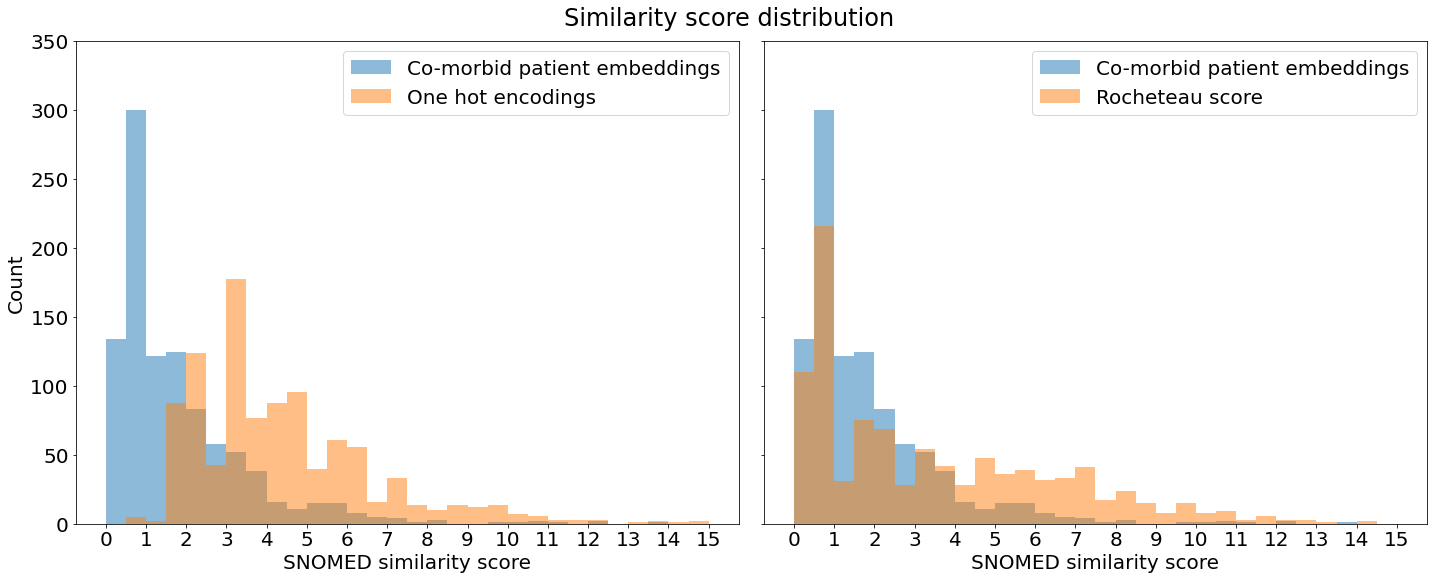

In [4]:
# Plot
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(20)

bins = np.linspace(0, 15, 31)
axs[0].hist(cbr_metric_my_method['similarity_score'], bins=bins, alpha=0.5, label='Co-morbid patient embeddings')
axs[0].hist(cbr_metric_one_hot['similarity_score'], bins=bins, alpha=0.5, label='One hot encodings')
axs[0].legend(loc='upper right')

axs[1].hist(cbr_metric_my_method['similarity_score'], bins=bins, alpha=0.5, label='Co-morbid patient embeddings')
axs[1].hist(cbr_metric_rocheteau['similarity_score'], bins=bins, alpha=0.5, label='Rocheteau score')
axs[1].legend(loc='upper right')

fig.tight_layout()
fig.subplots_adjust(top=0.92)

fig.suptitle("Similarity score distribution")

axs[0].set_ylim(0, 350)
axs[1].set_ylim(0, 350)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SNOMED similarity score')
axs[1].set_xlabel('SNOMED similarity score')
axs[0].set_xticks([0, 1, 2, 3, 4, 5 ,6 ,7 ,8 ,9 ,10 ,11, 12, 13, 14, 15])
axs[1].set_xticks([0, 1, 2, 3, 4, 5 ,6 ,7 ,8 ,9 ,10 ,11, 12, 13, 14, 15])

plt.show()

In [23]:
import scipy.stats as stats

def test_stats(list1, list2):

    # Assume non-normal distribution
    # Test if same distribution
    k2, p = stats.mannwhitneyu(list1, list2)
    alpha = 0.05
    print(p)
    if p < alpha:
        print('Different distribution')
    else:
        print(' Same distribution')
    
    k2, p = stats.pearsonr(list1, list2)
    alpha = 0.05
    print(p)
    if p < alpha:
        print('Different distribution')
    else:
        print(' Same distribution')

    k2, p = stats.spearmanr(list1, list2)
    alpha = 0.05
    print(p)
    if p < alpha:
        print('Different distribution')
    else:
        print(' Same distribution')

    k2, p = stats.wilcoxon(list1, list2)
    alpha = 0.05
    print(p)
    if p < alpha:
        print('Different distribution')
    else:
        print(' Same distribution')

In [108]:
test_stats(filtered_index_df2['similarity_score'].tolist(), dummies_index_df['similarity_score'].tolist())

1.2480636183398212e-176
Different distribution
0.0012688926994121438
Different distribution
6.142085101920294e-07
Different distribution
6.8096966305230804e-108
Different distribution


In [24]:
test_stats(cbr_metric_my_method['similarity_score'].tolist(), cbr_metric_one_hot['similarity_score'].tolist())

1.333817370878337e-176
Different distribution
0.0012688926994121438
Different distribution
6.200248491408138e-07
Different distribution
7.096026835358197e-108
Different distribution


In [25]:
test_stats(cbr_metric_my_method['similarity_score'].tolist(), cbr_metric_rocheteau['similarity_score'].tolist())

1.827433825930081e-30
Different distribution
1.357542924635112e-51
Different distribution
1.0851465390642961e-70
Different distribution
7.677926320033033e-67
Different distribution


In [26]:
test_stats(cbr_metric_one_hot['similarity_score'].tolist(), cbr_metric_rocheteau['similarity_score'].tolist())

1.0097135948934319e-25
Different distribution
1.587238347303768e-09
Different distribution
1.0450175706410031e-13
Different distribution
4.551015664030844e-10
Different distribution
